In [118]:
import pandas as pd
import numpy as np
from typing import Dict

In [119]:
def generate_columns() -> Dict[str, type]:
    """
    Generates the columns for the DataFrame. The column names are based off
    the variables table at https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm

    Returns:
      Dict[str, type]: A dictionary of column names and their respective types
    """

    columns: dict = {}

    for i in range(1, 50):
        columns[f"X{i}"] = np.float64
        columns[f"Y{i}"] = np.float64

    for i in range(1, 50):
        columns[f"Power{i}"] = np.float64

    columns.update({"qW": np.float64, "Total_Power": np.float64})
    return columns

## Loading the dataset


In [120]:
df: pd.DataFrame = pd.read_csv("../data/WEC_Perth_49.csv", dtype=generate_columns())

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36043 entries, 0 to 36042
Columns: 149 entries, X1 to Total_Power
dtypes: float64(149)
memory usage: 41.0 MB


In [122]:
df.shape

(36043, 149)

In [123]:
df.columns, df.index

(Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5',
        ...
        'Power42', 'Power43', 'Power44', 'Power45', 'Power46', 'Power47',
        'Power48', 'Power49', 'qW', 'Total_Power'],
       dtype='object', length=149),
 RangeIndex(start=0, stop=36043, step=1))

In [124]:
df.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
count,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,...,36043.000000,36043.00000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,36043.000000,3.604300e+04
mean,366.597060,18.709550,426.314033,51.085762,477.295590,57.846020,497.150488,73.323178,684.309548,44.012247,...,93678.772248,96530.68484,96666.293181,97007.214249,98466.265281,98106.278501,97462.663041,96134.920454,0.833849,3.938246e+06
std,307.911246,44.043295,265.781316,90.151852,270.322011,42.143917,279.631344,51.140816,237.862684,59.242702,...,7401.226140,6709.53446,7020.690028,4829.877255,4978.194259,4263.508074,3134.420742,3889.098339,0.026052,1.226171e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52516.130000,56391.97000,53877.360000,53050.330000,55401.380000,63028.260000,61717.310000,47257.430000,0.720000,3.388944e+06
25%,65.770000,0.000000,200.000000,0.000000,289.950000,50.000000,300.000000,50.000000,600.000000,0.000000,...,88177.210000,94648.08000,96932.520000,97612.350000,97629.940000,97154.630000,96869.740000,96319.550000,0.810000,3.847335e+06
50%,250.000000,0.000000,346.090000,37.520000,400.000000,74.820000,500.000000,100.000000,700.000000,0.080000,...,93694.540000,98729.91000,99269.310000,98857.150000,100423.930000,99805.920000,98710.730000,96543.090000,0.830000,3.931541e+06
75%,600.000000,0.000000,745.980000,37.900000,689.800000,74.960000,632.750000,112.150000,850.000000,50.000000,...,100997.520000,100622.52000,100282.360000,99156.130000,101370.970000,100955.350000,99064.495000,97036.300000,0.860000,4.063623e+06
max,1000.000000,885.590000,1000.000000,939.260000,1000.000000,990.000000,1000.000000,990.000000,1000.000000,919.590000,...,110945.940000,109400.43000,114194.520000,106702.150000,104751.350000,102892.110000,102275.480000,101876.140000,0.880000,4.177659e+06


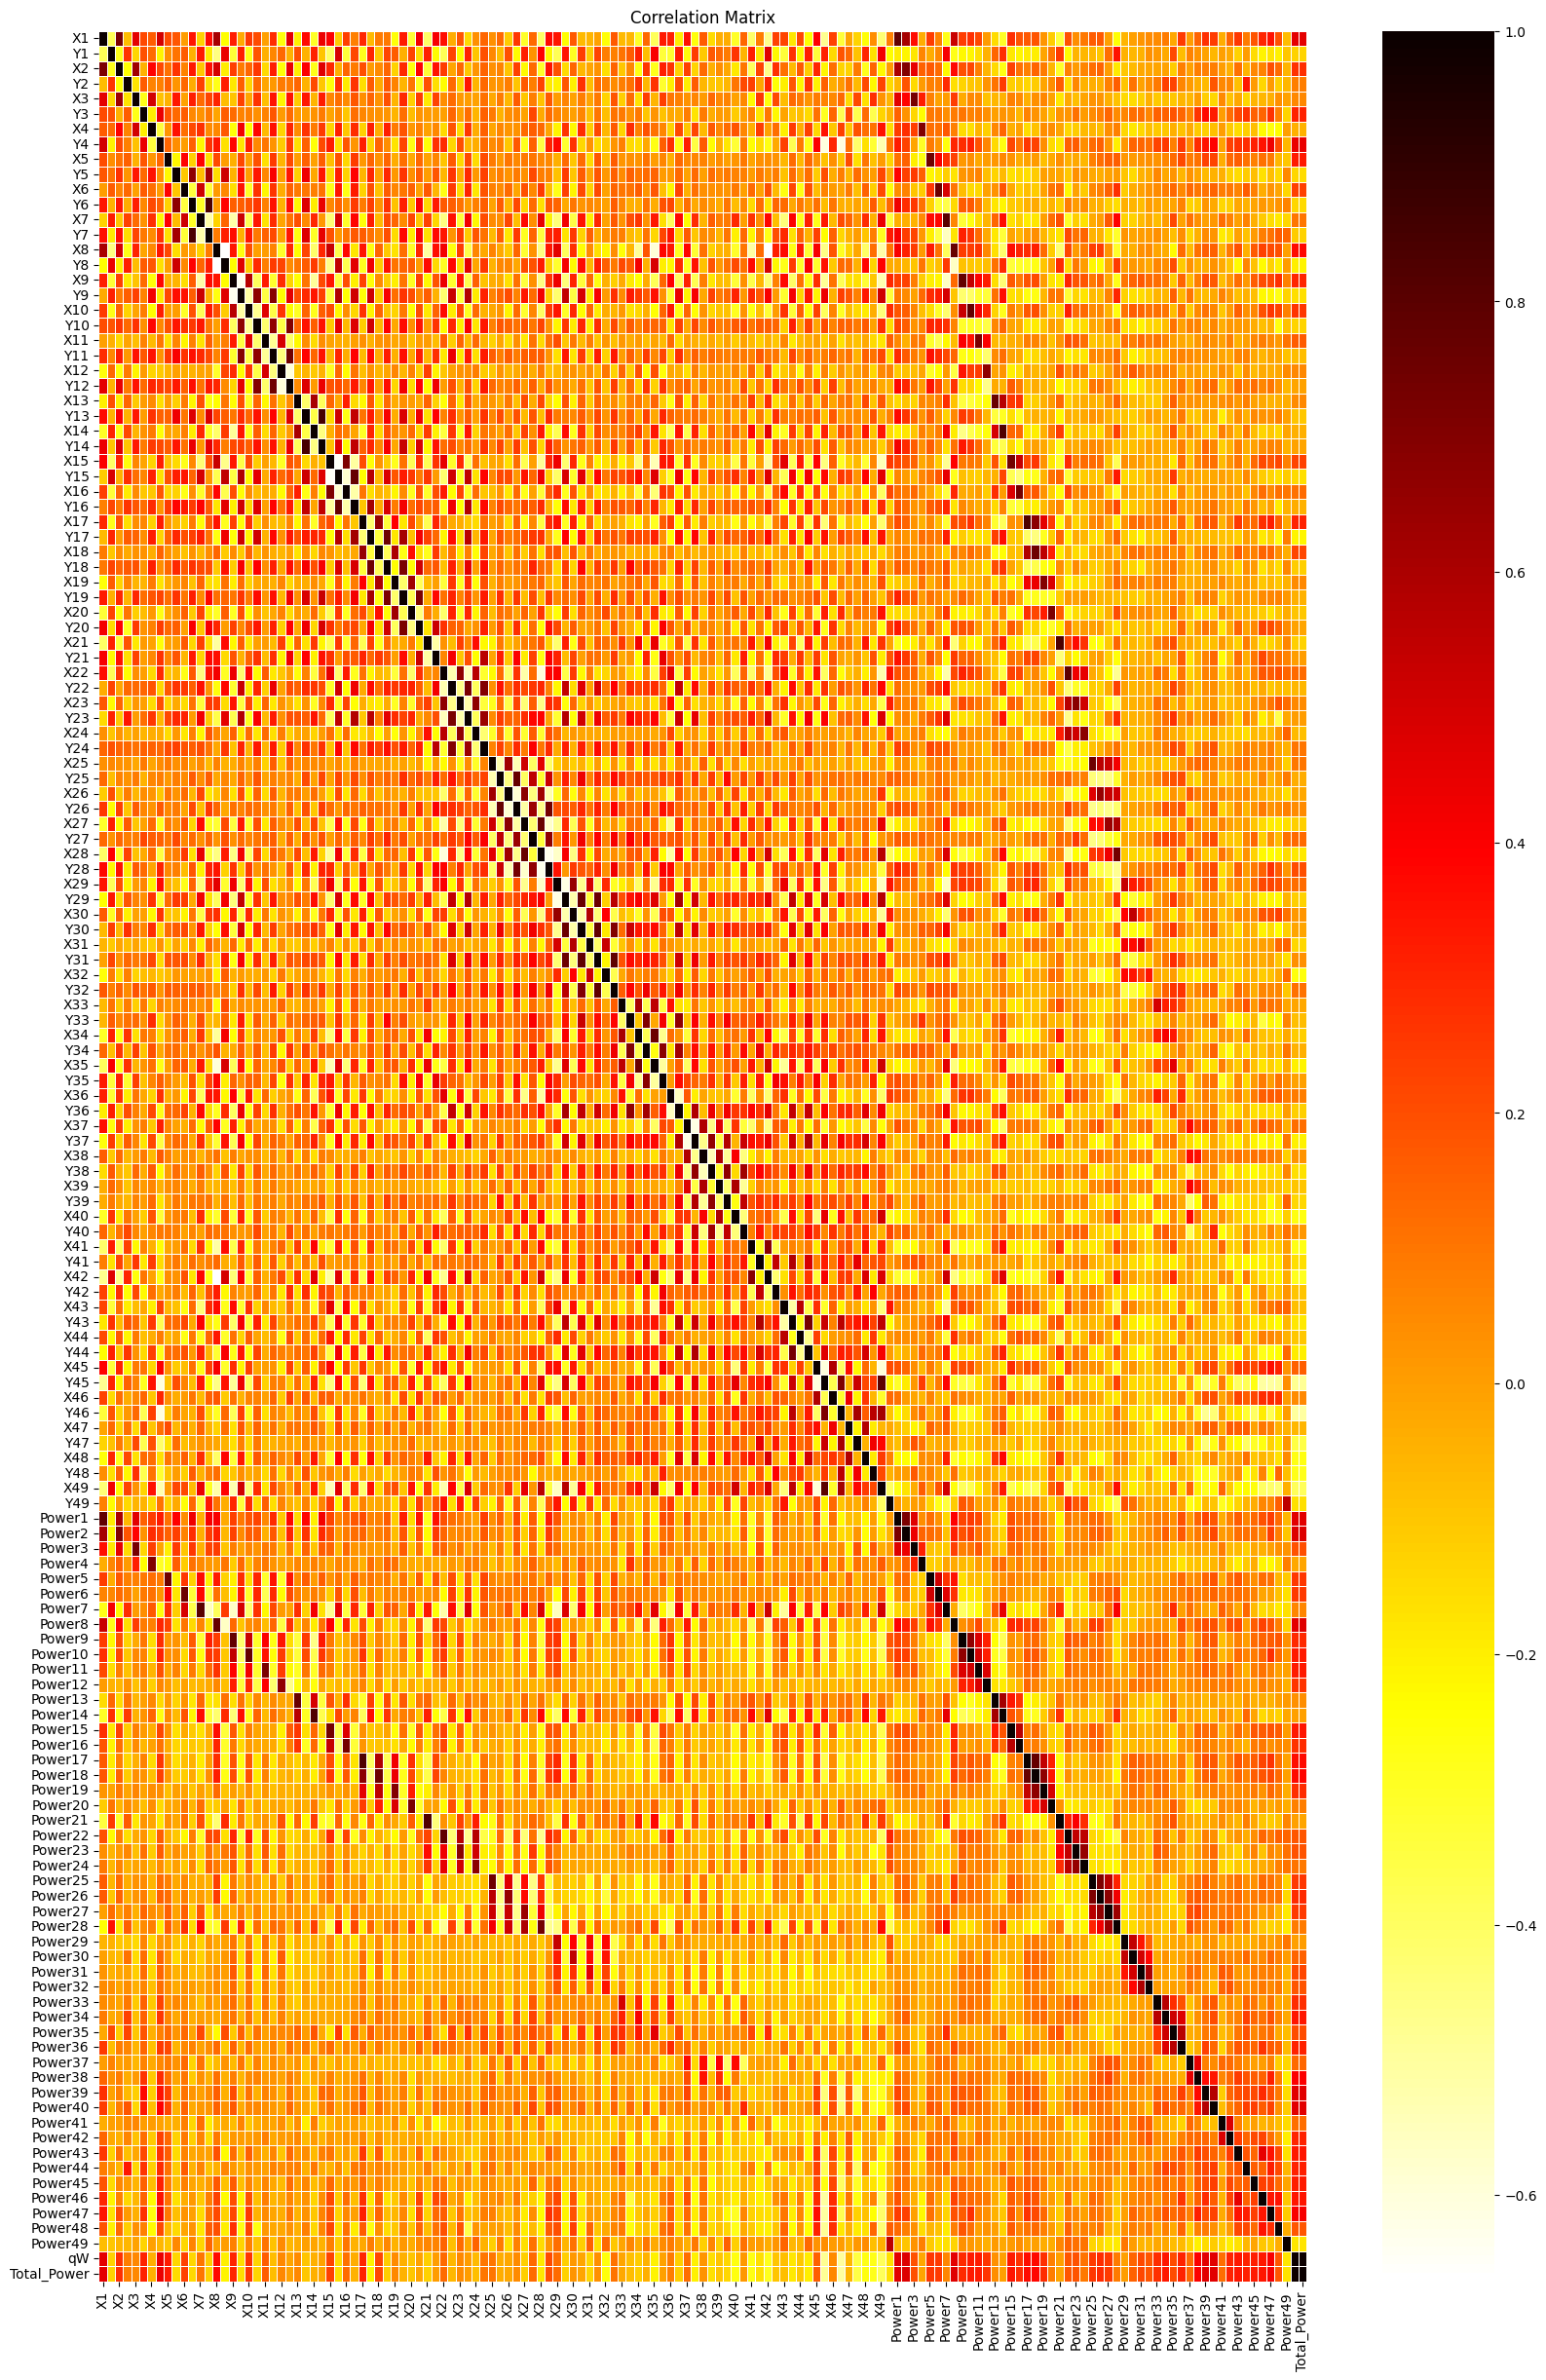

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(20, 30))

# reverse hot colormap
sns.heatmap(correlation_matrix, annot=False, cmap="hot_r", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

In [174]:
X = df.drop(["Total_Power"], axis=1)
y = df["Total_Power"]

X.shape, y.shape

((36043, 148), (36043,))

## Principal Component Analysis

### Dropping columns

The dataset contains 149 columns, from which the XY from 1 to 49 refer to a coordinate system from


In [127]:
X = X.drop(X.columns[X.columns.str.contains("X")], axis=1)
X = X.drop(X.columns[X.columns.str.contains("Y")], axis=1)

X.head()

,Power1,Power2,Power3,Power4,Power5,Power6,Power7,Power8,Power9,Power10,...,Power41,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW
0,71265.25,77995.25,72872.99,69061.17,70271.92,70133.17,70275.04,72878.46,75002.15,77099.61,...,77097.57,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87
1,72871.68,76893.17,72604.11,68857.32,74134.45,70271.21,70233.26,72970.56,74838.49,77055.08,...,77044.77,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87
2,72724.29,76995.80,72612.33,68855.75,72698.52,71859.26,70298.29,72987.39,74842.03,77062.81,...,77038.66,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87
3,72759.25,77036.33,72717.21,68656.01,72735.03,71842.15,70158.08,73220.73,75117.22,76983.41,...,77057.86,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87
4,44620.44,45945.24,47067.08,48278.17,56778.37,55045.52,54072.63,53794.42,73417.62,79860.68,...,76869.43,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79


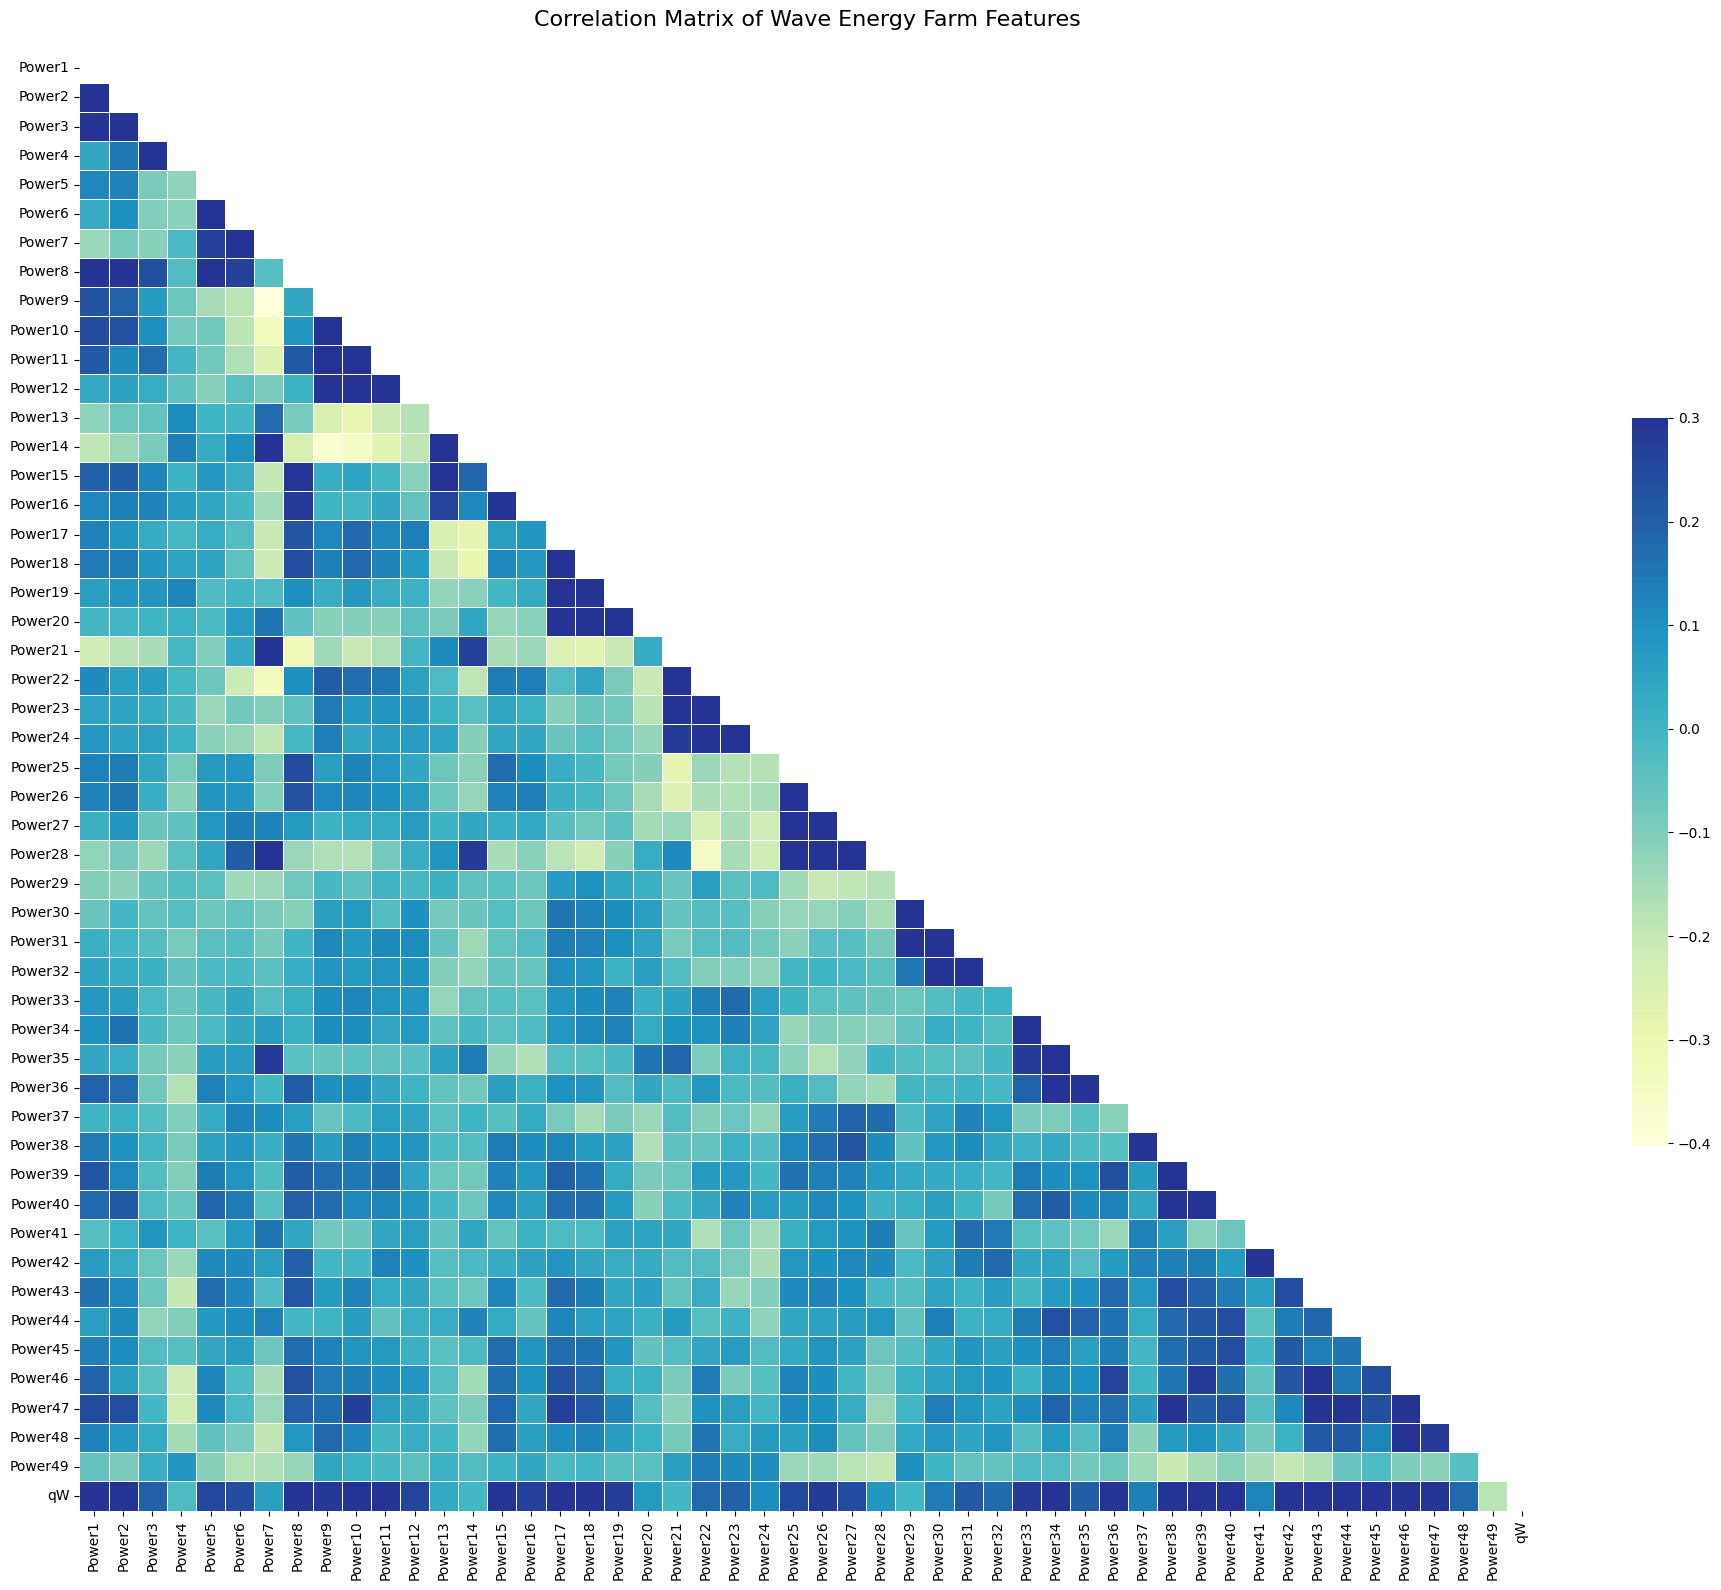

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(20, 16))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr,
    mask=mask,
    cmap="YlGnBu",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=False,
)

plt.title("Correlation Matrix of Wave Energy Farm Features", fontsize=16, pad=20)
plt.tight_layout()

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")

plt.show()

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
features_scaled: np.ndarray = scaler.fit_transform(X)

pca: PCA = PCA(random_state=42)
pca_result: np.ndarray = pca.fit_transform(features_scaled)

cumulative_variance_ratio: np.ndarray = np.cumsum(pca.explained_variance_ratio_)
n_components_95: int = np.argmax(cumulative_variance_ratio >= 0.95) + 1

df_pca = pd.DataFrame(
    pca_result[:, :n_components_95],
    columns=[f"PC{i+1}" for i in range(n_components_95)],
)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,2.447520,-0.067833,-2.099885,-1.342989,-0.475941,5.713755,1.791782,-0.588539,-2.171291,-2.309713,...,0.681140,0.214688,-0.367187,-0.117402,0.017017,-0.322053,-0.322013,-0.049370,-0.330844,0.387485
1,2.425570,0.032667,-2.105416,-1.359434,-0.464597,5.750329,1.775613,-0.723134,-2.054169,-2.357800,...,0.714699,0.370318,-0.375921,-0.179498,0.018089,-0.284847,-0.324990,-0.018050,-0.402877,0.321273
2,2.420634,0.046961,-2.097325,-1.356258,-0.469535,5.741760,1.793645,-0.713372,-2.051858,-2.353082,...,0.716320,0.298539,-0.379652,-0.137242,0.019384,-0.258696,-0.311422,-0.062572,-0.380521,0.319612
3,2.457473,0.039213,-2.109271,-1.311299,-0.437310,5.719494,1.795807,-0.682753,-2.050836,-2.348017,...,0.712137,0.312215,-0.353307,-0.143999,0.023895,-0.268318,-0.327065,-0.066121,-0.399982,0.314003
4,-1.125014,-0.911250,-0.906010,-1.632420,-1.009267,4.072823,-3.443425,-0.054935,-1.397863,-0.953574,...,0.201717,0.040666,-0.254517,-0.791368,0.070473,-0.166477,-0.175097,-0.337859,0.167455,0.147952


In [130]:
df_pca["Total_Power"] = y

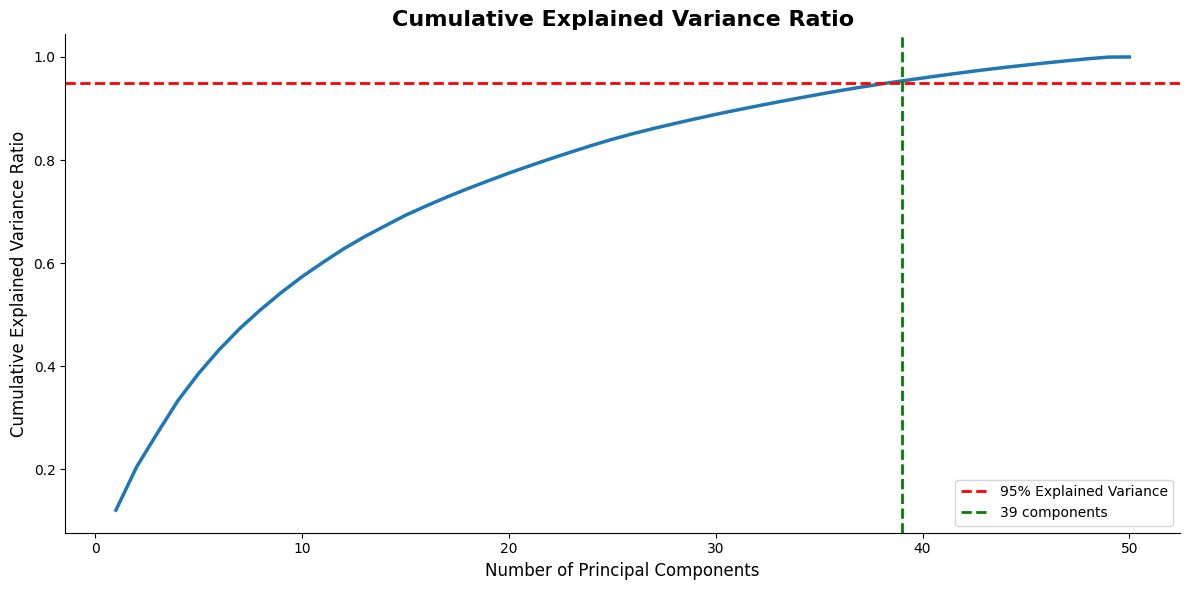

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(
    x=range(1, len(cumulative_variance_ratio) + 1),
    y=cumulative_variance_ratio,
    linewidth=2.5,
)

plt.axhline(
    y=0.95, color="r", linestyle="--", label="95% Explained Variance", linewidth=2
)

plt.axvline(
    x=n_components_95,
    color="g",
    linestyle="--",
    label=f"{n_components_95} components",
    linewidth=2,
)


plt.title("Cumulative Explained Variance Ratio", fontsize=16, fontweight="bold")
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance Ratio", fontsize=12)

plt.legend(fontsize=10)
sns.despine()
plt.tight_layout()

plt.show()

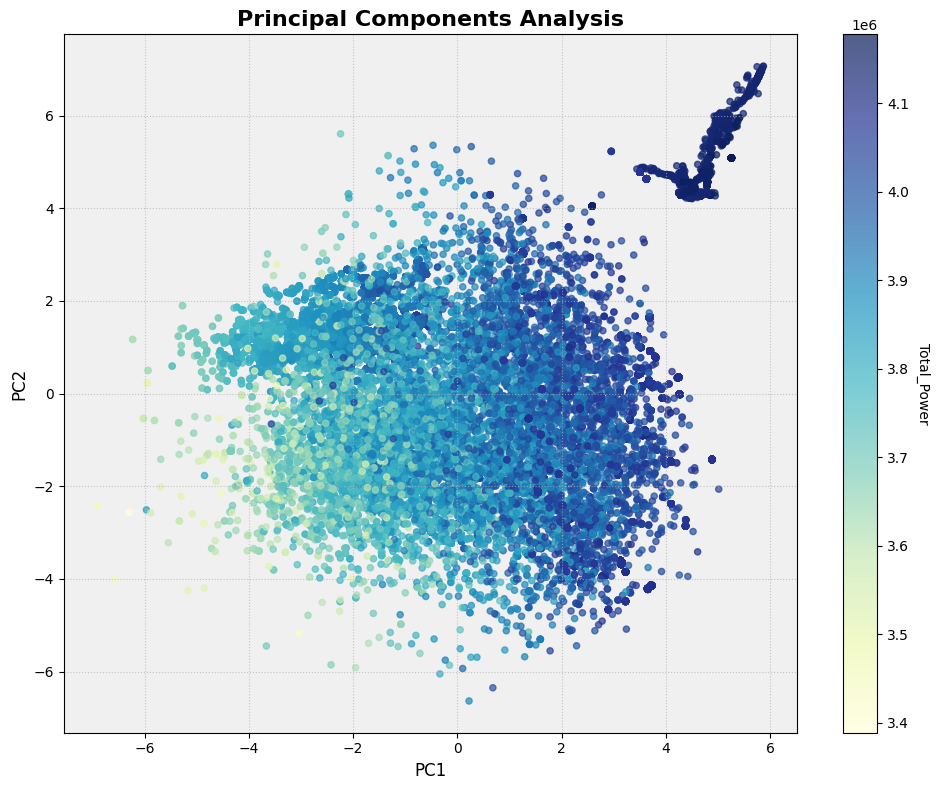

In [132]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_pca["PC1"],
    df_pca["PC2"],
    c=df_pca["Total_Power"],
    cmap="YlGnBu",
    s=20,
    alpha=0.7,
)

plt.title("Principal Components Analysis", fontsize=16, fontweight="bold")
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label("Total_Power", rotation=270, labelpad=15)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")

plt.tight_layout()
plt.show()

In [133]:
correlation_matrix: pd.DataFrame = pd.DataFrame(
    pca.components_[:n_components_95, :].T,
    columns=[f"PC{i+1}" for i in range(n_components_95)],
    index=X.columns,
)

correlation_matrix = correlation_matrix.abs()
correlation_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
Power1,0.227347,0.017336,0.027763,0.132492,0.162870,0.079611,0.180954,0.257010,0.063239,0.048413,...,0.052142,0.019644,0.047825,0.016848,0.215111,0.018091,0.123045,0.038788,0.050289,0.195182
Power2,0.204388,0.011084,0.015684,0.127541,0.176283,0.095099,0.240230,0.212724,0.129802,0.077417,...,0.068552,0.078383,0.038868,0.018862,0.137985,0.151256,0.044078,0.118065,0.052743,0.089796
Power3,0.081953,0.075318,0.129046,0.102494,0.231381,0.076801,0.311038,0.162731,0.137474,0.003015,...,0.191476,0.152822,0.039124,0.060433,0.481414,0.203428,0.145124,0.056675,0.075012,0.027594
Power4,0.063604,0.061057,0.072869,0.038584,0.227772,0.052106,0.272914,0.097365,0.183676,0.095943,...,0.185786,0.064526,0.117848,0.034281,0.105016,0.085659,0.009350,0.008272,0.030375,0.059780
Power5,0.072763,0.187117,0.113411,0.002981,0.121768,0.004665,0.026071,0.206754,0.338698,0.171571,...,0.101821,0.433895,0.047998,0.190386,0.111176,0.052621,0.025635,0.110483,0.053868,0.063456
Power6,0.027034,0.249355,0.144408,0.017091,0.062619,0.055337,0.104640,0.116176,0.313893,0.113713,...,0.069654,0.188579,0.077614,0.157596,0.101997,0.265855,0.074612,0.259879,0.161803,0.093388
Power7,0.122589,0.266072,0.237591,0.058025,0.001324,0.087219,0.197753,0.013045,0.072181,0.014769,...,0.077835,0.090709,0.145118,0.072543,0.101527,0.303669,0.149753,0.079964,0.087608,0.261539
Power8,0.218565,0.085514,0.040763,0.076742,0.212975,0.015843,0.049776,0.195214,0.247799,0.007789,...,0.211751,0.313047,0.187840,0.100969,0.240509,0.132339,0.056817,0.397912,0.093769,0.053410
Power9,0.193103,0.178380,0.136795,0.073304,0.200188,0.100830,0.015405,0.000749,0.110370,0.001297,...,0.063055,0.052854,0.062212,0.333595,0.011581,0.143807,0.004969,0.136942,0.180471,0.257191
Power10,0.213358,0.144259,0.141029,0.047198,0.171727,0.127271,0.013608,0.015620,0.112313,0.006864,...,0.070699,0.061260,0.140616,0.015197,0.000600,0.163574,0.092565,0.069952,0.027406,0.347160


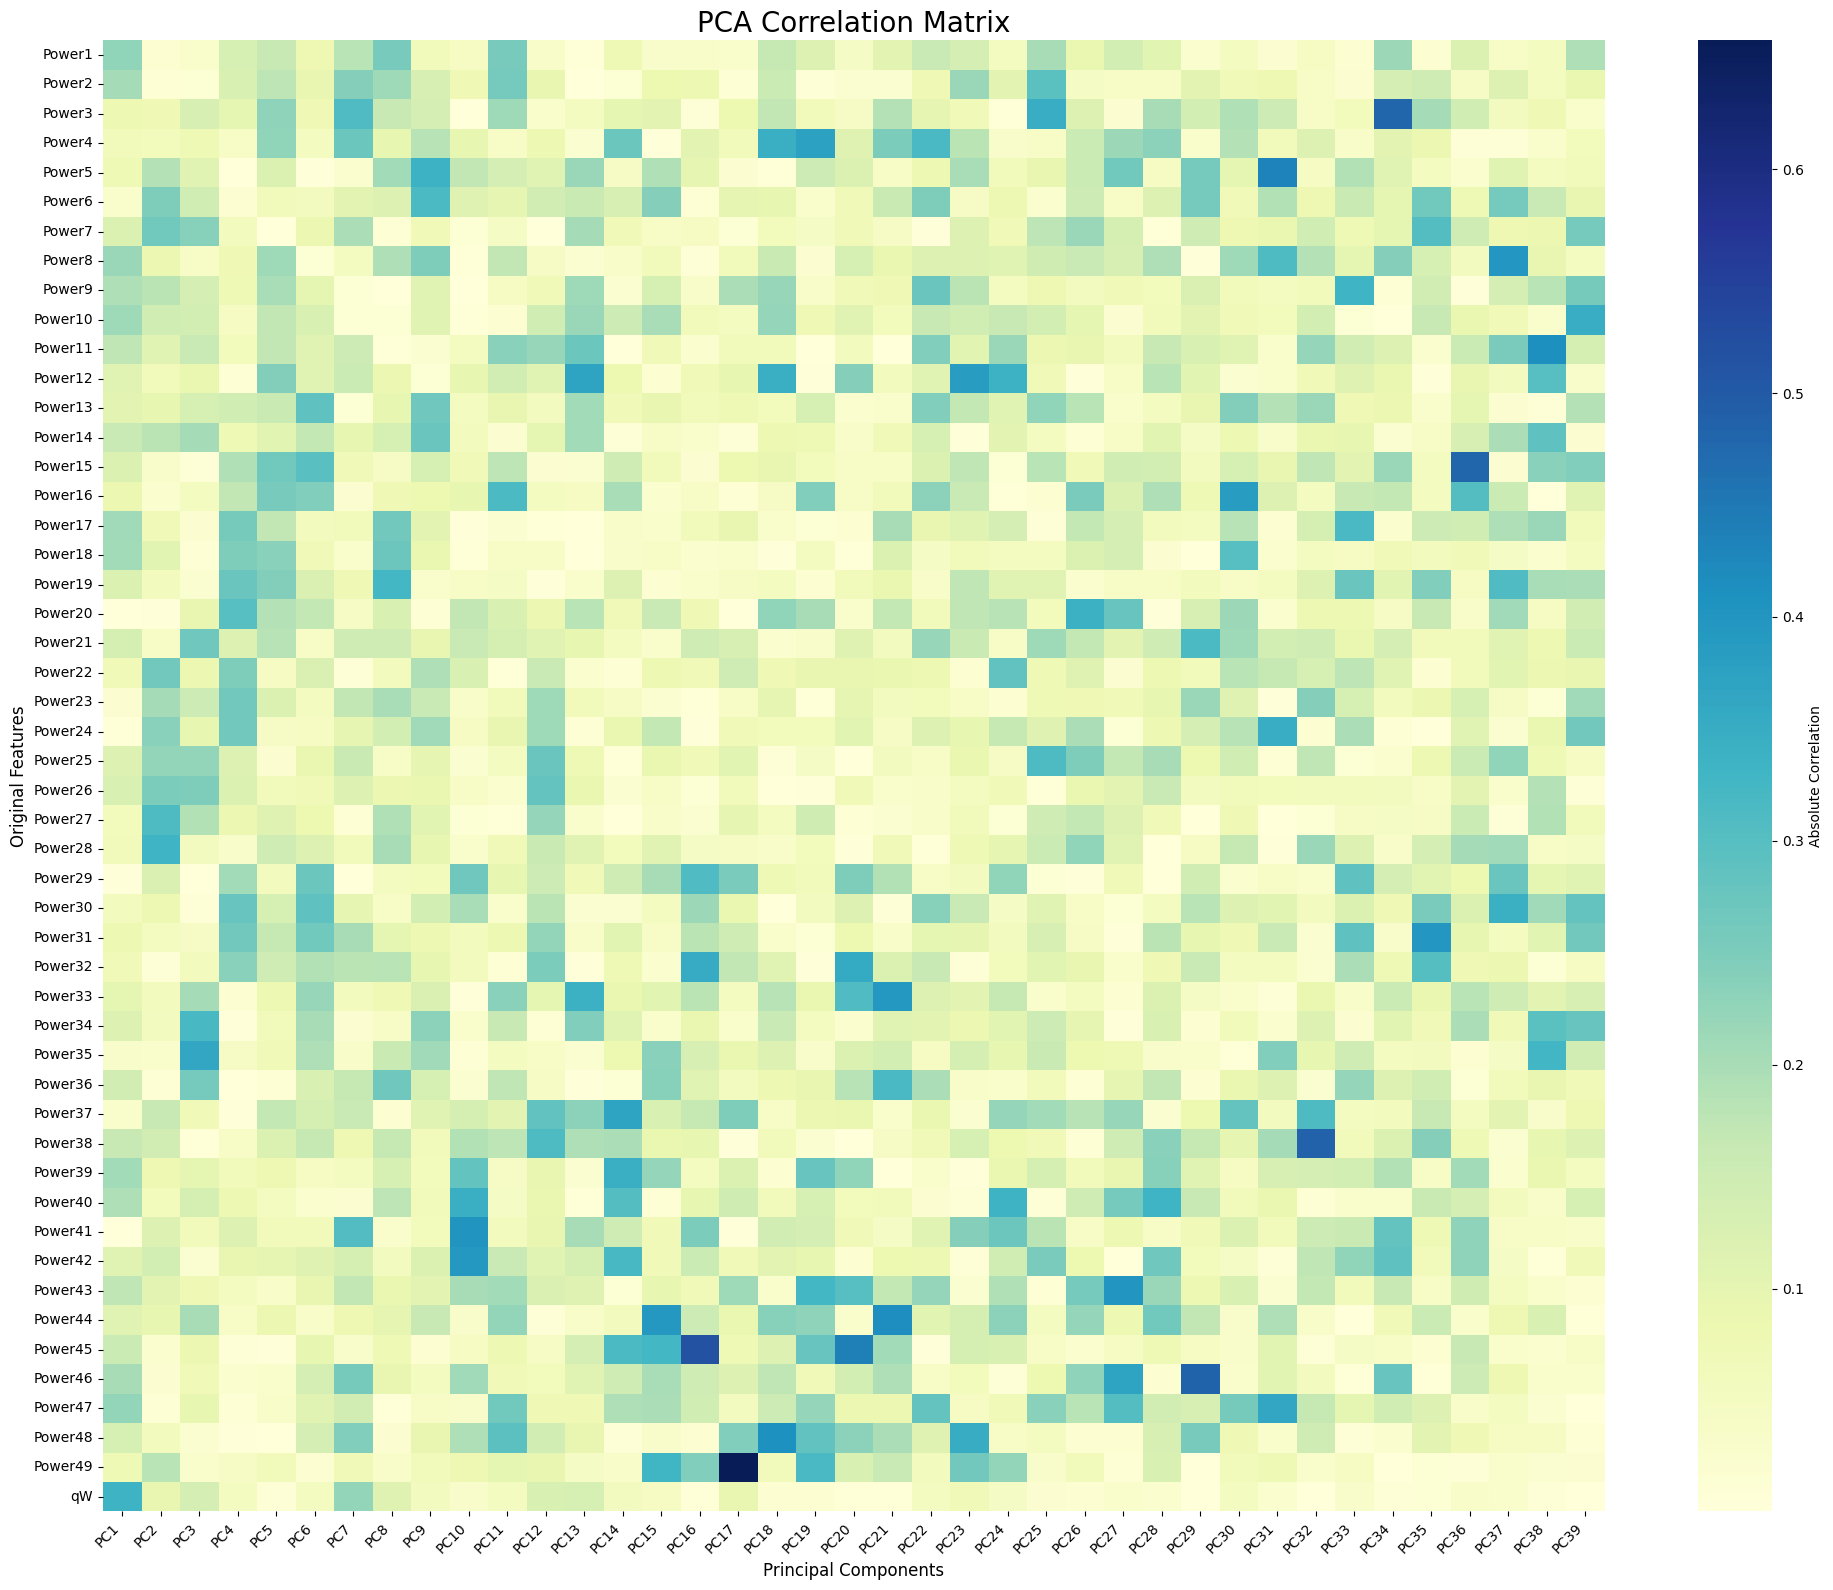

In [134]:
plt.figure(figsize=(20, 16))

sns.heatmap(
    correlation_matrix, cmap="YlGnBu", cbar_kws={"label": "Absolute Correlation"}
)


plt.title("PCA Correlation Matrix", fontsize=20)
plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("Original Features", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [135]:
top_features: dict = {}
for pc in correlation_matrix.columns:
    top_features[pc] = correlation_matrix[pc].nlargest(10).index.tolist()

print("Top 10 Features for each principal component")

from tabulate import tabulate

print(tabulate(top_features, headers="keys", tablefmt="pretty"))

Top 10 Features for each principal component
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|   PC1   |   PC2   |   PC3   |   PC4   |   PC5   |   PC6   |   PC7   |   PC8   |   PC9   |  PC10   |  PC11   |  PC12   |  PC13   |  PC14   |  PC15   |  PC16   |  PC17   |  PC18   |  PC19   |  PC20   |  PC21   |  PC22   |  PC23   |  PC24   |  PC25   |  PC26   |  PC27   |  PC28   |  PC29   |  PC30   |  PC31   |  PC32   |  PC33   |  PC34   |  PC35   |  PC36   |  PC37   |  PC38   |  PC39   |
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+

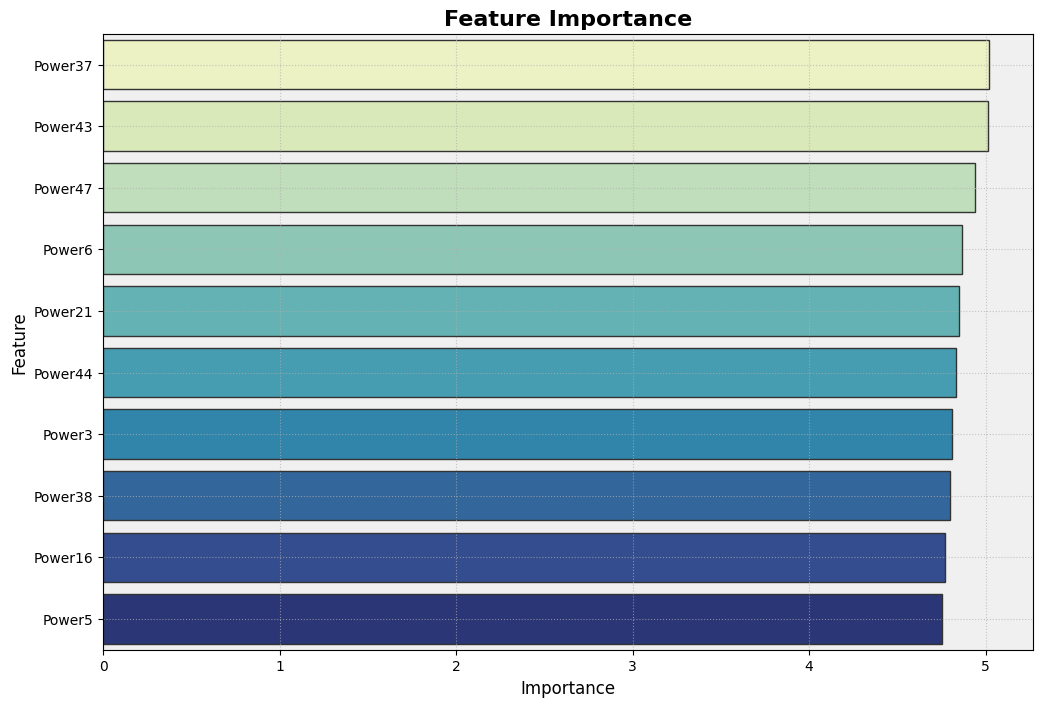

In [136]:
feature_importance: pd.DataFrame = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": np.sum(np.abs(pca.components_[:n_components_95, :]), axis=0),
    }
)

feature_importance = feature_importance.sort_values("importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance.head(10),
    palette="YlGnBu",
    edgecolor=".2",
    hue="feature",
)

plt.title("Feature Importance", fontsize=16, fontweight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

In [137]:
print(f"Number of components explaining 95% of variance: {n_components_95}")
print(f"Total number of features: {len(X.columns)}")

Number of components explaining 95% of variance: 39
Total number of features: 50


Trying to fit a linear regression model with sklear


In [138]:
X_pca = df_pca.drop(["Total_Power"], axis=1)
y_pca = df_pca["Total_Power"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Intercept: {lr_model.intercept_}")

Mean Squared Error: 17560763.604120795
R2 Score: 0.9988084940223867
Intercept: 3938248.3609718205


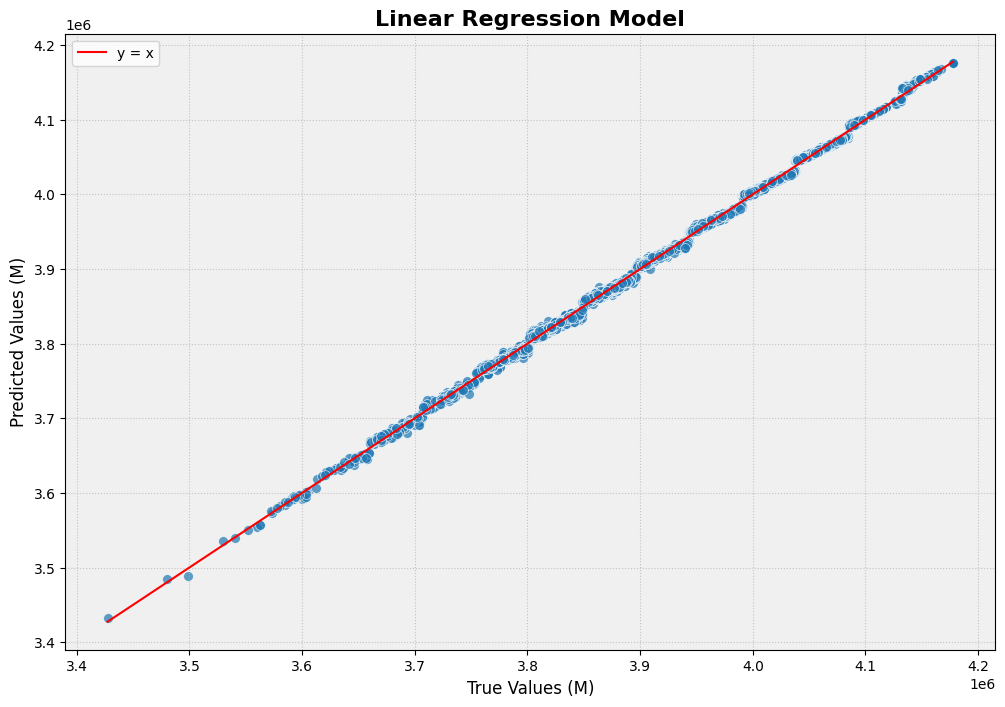

In [139]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, s=50)
sns.lineplot(x=y_test, y=y_test, color="r", label="y = x")

plt.title("Linear Regression Model", fontsize=16, fontweight="bold")
plt.xlabel("True Values (M)", fontsize=12)
plt.ylabel("Predicted Values (M)", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

## Linear Regression Model


In [140]:
from numba import jit
from typing import Tuple


@jit(nopython=True)
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculates the mean squared error between the true and predicted values
    of a dataset.

    Args:
        y_true (np.ndarray): The true values of the dataset
        y_pred (np.ndarray): The predicted values of the dataset

    Returns:
        float: The mean squared error between the true and predicted values
    """

    return (1 / len(y_true)) * np.sum((y_true - y_pred) ** 2)


@jit(nopython=True)
def r2(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    """
    Calculates the R^2 score between the true and predicted values of a dataset.

    Args:
        y_true (np.ndarray): The true values of the dataset
        y_pred (np.ndarray): The predicted values of the dataset

    Returns:
        float: The R^2 score between the true and predicted values
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    return 1 - (ss_res / ss_tot)


@jit(nopython=True)
def gradient_descent(
    X: np.ndarray, y: np.ndarray, lr: float, epochs: int
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calculates the optimal weights for a linear regression model using
    gradient descent algorithm.

    Uses the mean squared error as the loss function to minimize.

    Args:
        X (np.ndarray): The input features of the dataset
        y (np.ndarray): The true values of the dataset
        lr (float): The learning rate of the algorithm
        epochs (int): The number of iterations to run the algorithm

    Returns:
        Tuple[np.ndarray, np.ndarray]: The optimal weights of the model and the loss  at each epoch
    """

    m, n = X.shape
    theta: np.ndarray = np.zeros(n)
    loss: np.ndarray = np.zeros(epochs)

    for i in range(epochs):
        y_pred = X.dot(theta)
        loss[i] = mse(y, y_pred)

        gradient: np.ndarray = (1 / m) * X.T.dot((y_pred - y))
        theta -= lr * gradient

    return theta, loss


def split_dataset(
    X: np.ndarray,
    y: np.ndarray,
    train_ratio: float = 0.6,
    val_ratio: float = 0.2,
    test_ratio: float = 0.2,
    random_state: int = 42,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Splits the dataset into training, validation, and testing sets based on the
    provided ratios.

    Args:
        X (np.ndarray): The input features of the dataset
        y (np.ndarray): The true values of the dataset
        train_ratio (float, optional): The ratio of the training set.
                                       Defaults  to 0.6.
        val_ratio (float, optional): The ratio of the validation set.
                                     Defaults to 0.2.
        test_ratio (float, optional): The ratio of the testing set.
                                      Defaults to 0.2.
        random_state (int, optional): The random seed for reproducibility.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]: The training, validation, and testing sets for X and y
    """
    assert train_ratio + val_ratio + test_ratio == 1, "Ratios must sum to 1"

    np.random.seed(random_state)

    n: int = len(y)
    indices: np.ndarray = np.arange(n)
    np.random.shuffle(indices)

    X_shuffled = X[indices]
    y_shuffled = y[indices]

    train_size: int = int(n * train_ratio)
    val_size: int = int(n * val_ratio)

    X_train = X_shuffled[:train_size]
    y_train = y_shuffled[:train_size]

    X_val = X_shuffled[train_size : train_size + val_size]
    y_val = y_shuffled[train_size : train_size + val_size]

    X_test = X_shuffled[train_size + val_size :]
    y_test = y_shuffled[train_size + val_size :]

    return X_train, X_val, X_test, y_train, y_val, y_test


def standard_scaler(
    X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    mean: np.ndarray = np.mean(X_train, axis=0)
    std: np.ndarray = np.std(X_train, axis=0)

    X_train_scaled: np.ndarray = (X_train - mean) / std
    X_val_scaled: np.ndarray = (X_val - mean) / std
    X_test_scaled: np.ndarray = (X_test - mean) / std

    return X_train_scaled, X_val_scaled, X_test_scaled

In [176]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(
    X.values, y.values, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2
)

X_train_scaled, X_val_scaled, X_test_scaled = standard_scaler(X_train, X_val, X_test)

# bias terms
X_train_gd = np.c_[np.ones(len(X_train_scaled)), X_train_scaled]
X_val_gd = np.c_[np.ones(len(X_val_scaled)), X_val_scaled]
X_test_gd = np.c_[np.ones(len(X_test_scaled)), X_test_scaled]

alpha: float = 0.01
epochs: int = 1000

theta, loss = gradient_descent(X_train_gd, y_train, alpha, epochs)
theta_val, loss_val = gradient_descent(X_val_gd, y_val, alpha, epochs)

In [177]:
y_pred_gd = X_val_gd.dot(theta)
mse_gd = mse(y_val, y_pred_gd)
r2_gd = r2(y_val, y_pred_gd)

print(f"Mean Squared Error (Gradient Descent): {mse_gd}")
print(f"R2 Score (Gradient Descent): {r2_gd}")
print(f"Intercept (Gradient Descent): {theta[0]}")

Mean Squared Error (Gradient Descent): 21271675.789089337
R2 Score (Gradient Descent): 0.998603603834028
Intercept (Gradient Descent): 3938087.3308043196


In [178]:
y_pred_gd = X_test_gd.dot(theta)
mse_gd = mse(y_test, y_pred_gd)
r2_gd = r2(y_test, y_pred_gd)

print(f"Mean Squared Error (Gradient Descent): {mse_gd}")
print(f"R2 Score (Gradient Descent): {r2_gd}")
print(f"Intercept (Gradient Descent): {theta[0]}")

Mean Squared Error (Gradient Descent): 21173145.799876202
R2 Score (Gradient Descent): 0.9985836724136133
Intercept (Gradient Descent): 3938087.3308043196


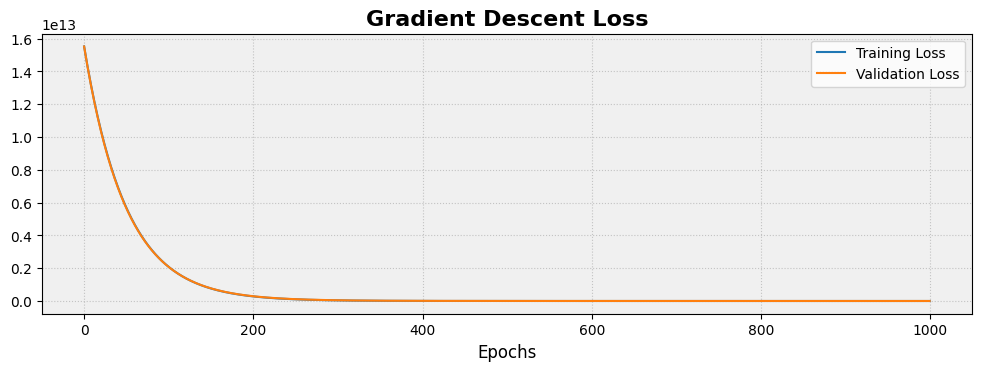

In [180]:
# subplots

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)

plt.plot(range(epochs), loss, label="Training Loss")
plt.plot(range(epochs), loss_val, label="Validation Loss")

plt.title("Gradient Descent Loss", fontsize=16, fontweight="bold")
plt.xlabel("Epochs", fontsize=12)

plt.legend()
plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

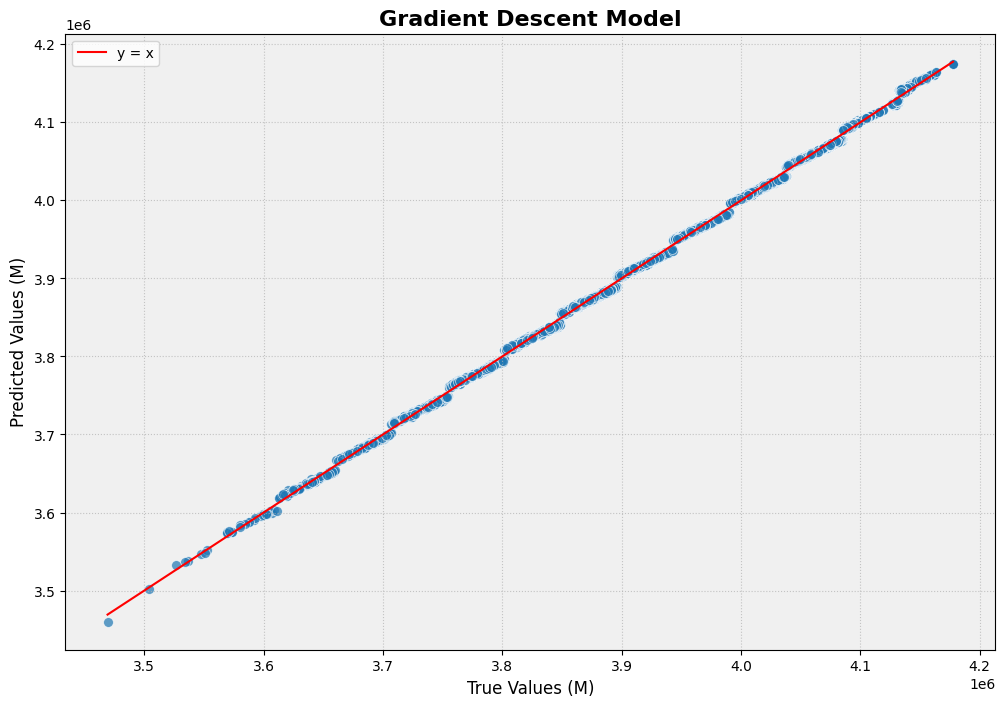

In [145]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=y_test, y=y_pred_gd, alpha=0.7, s=50)
sns.lineplot(x=y_test, y=y_test, color="r", label="y = x")

plt.title("Gradient Descent Model", fontsize=16, fontweight="bold")
plt.xlabel("True Values (M)", fontsize=12)
plt.ylabel("Predicted Values (M)", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

### Residuals Analysis


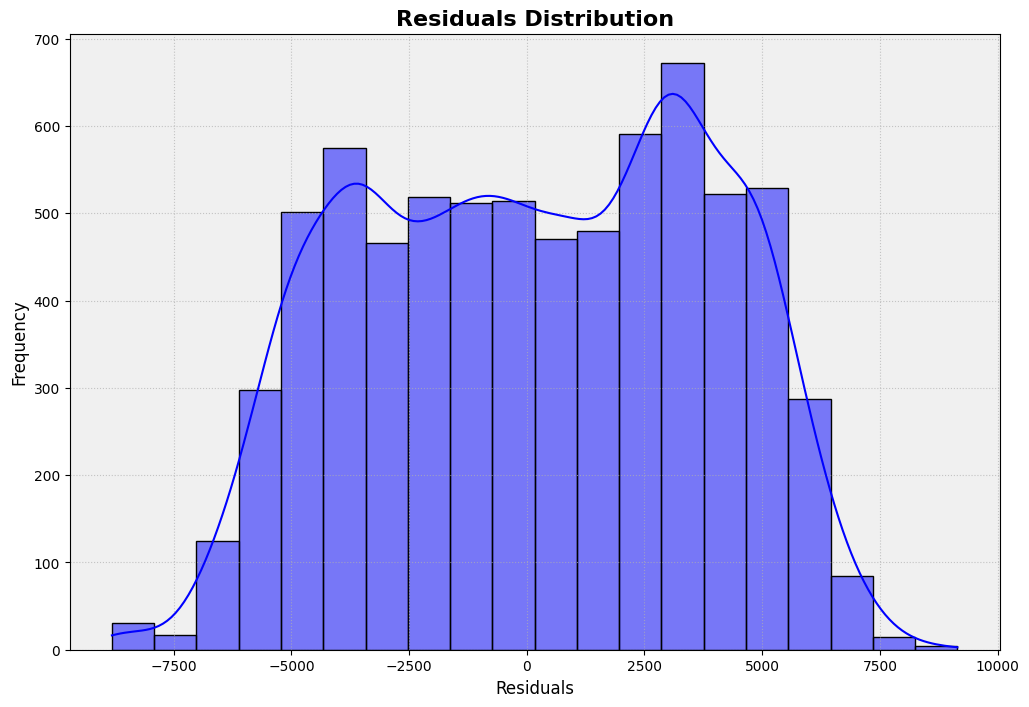

In [146]:
residuals = y_test - y_pred_gd

plt.figure(figsize=(12, 8))

sns.histplot(residuals, kde=True, color="b", bins=20)

plt.title("Residuals Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

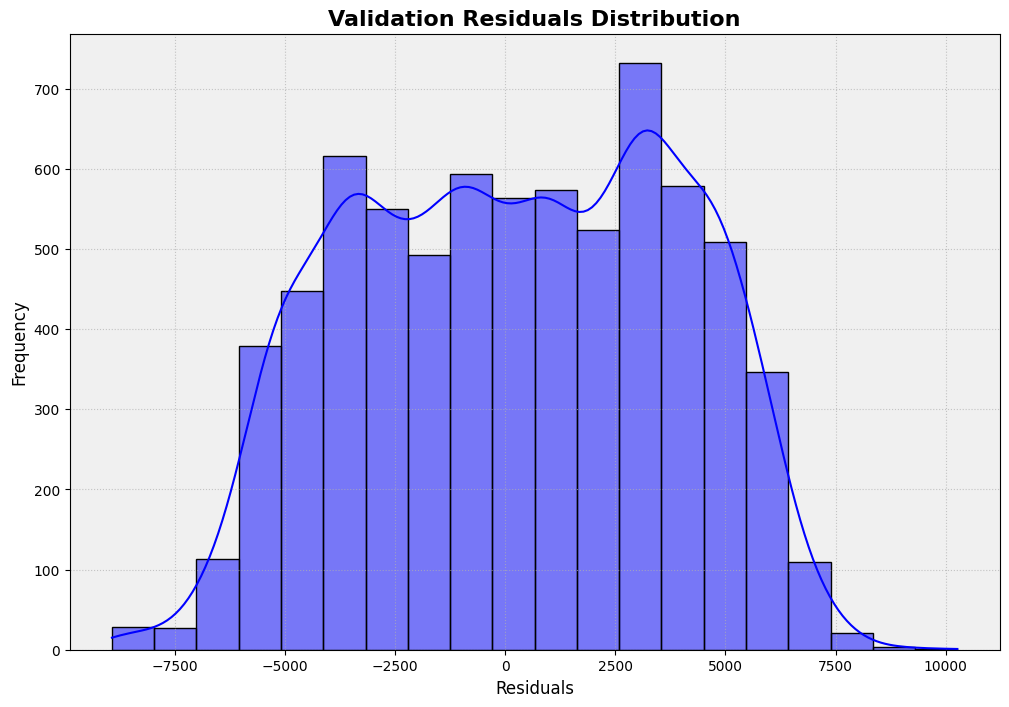

In [147]:
y_pred_val = X_val_gd.dot(theta)
residuals_val = y_val - y_pred_val

plt.figure(figsize=(12, 8))

sns.histplot(residuals_val, kde=True, color="b", bins=20)

plt.title("Validation Residuals Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

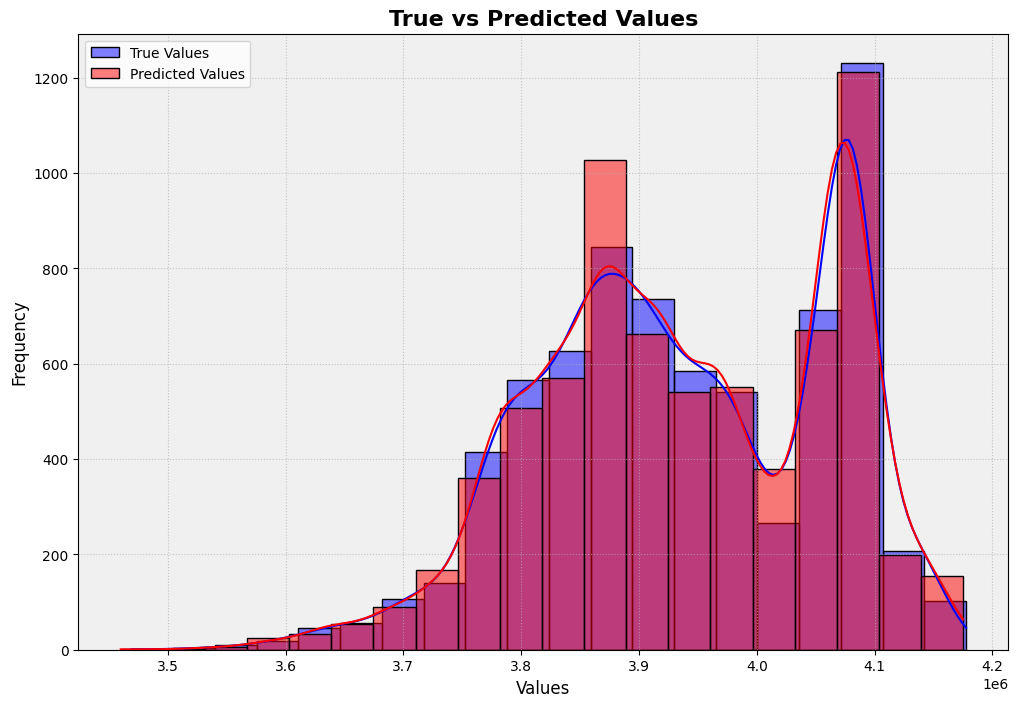

In [148]:
plt.figure(figsize=(12, 8))

sns.histplot(y_test, kde=True, color="b", bins=20, label="True Values")
sns.histplot(y_pred_gd, kde=True, color="r", bins=20, label="Predicted Values")

plt.title("True vs Predicted Values", fontsize=16, fontweight="bold")
plt.xlabel("Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.legend()

plt.show()

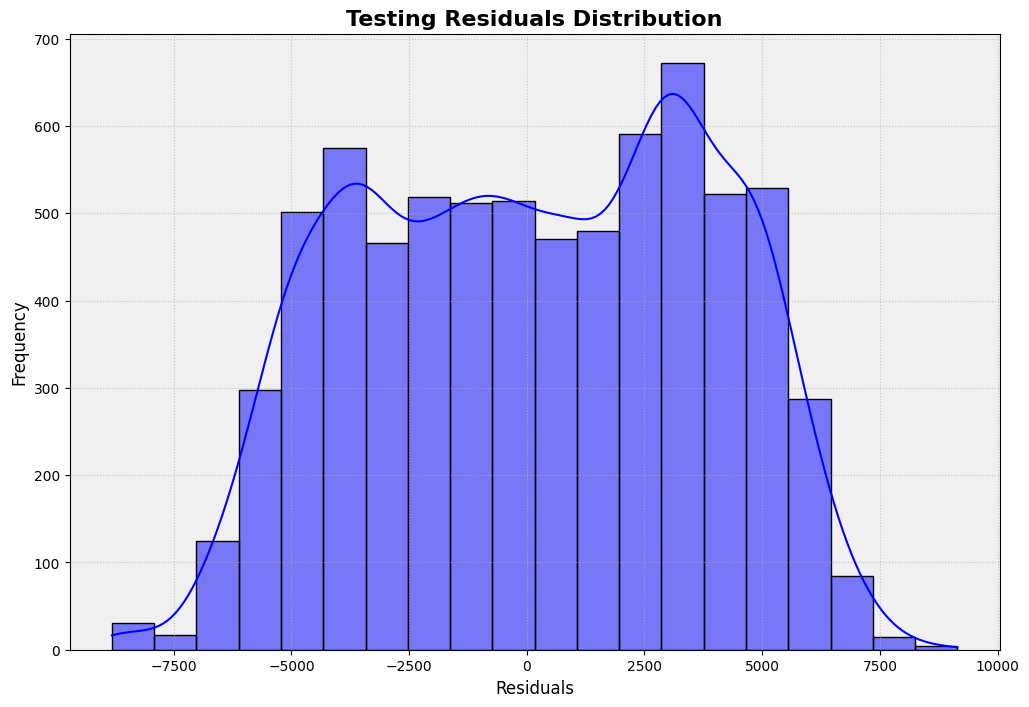

In [149]:
residuals_test = y_test - y_pred_gd

plt.figure(figsize=(12, 8))

sns.histplot(residuals_test, kde=True, color="b", bins=20)

plt.title("Testing Residuals Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.7)
plt.gca().set_facecolor("#F0F0F0")
plt.show()

In [150]:
print("Validation Set Statistics:")
print(f"Mean of residuals: {np.mean(residuals_val):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals_val):.4f}")
print(f"Min residual: {np.min(residuals_val):.4f}")
print(f"Max residual: {np.max(residuals_val):.4f}")

print("\nTest Set Statistics:")
print(f"Mean of residuals: {np.mean(residuals_test):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals_test):.4f}")
print(f"Min residual: {np.min(residuals_test):.4f}")
print(f"Max residual: {np.max(residuals_test):.4f}")

Validation Set Statistics:
Mean of residuals: 214.7800
Standard deviation of residuals: 3613.7574
Min residual: -8927.8944
Max residual: 10266.5619

Test Set Statistics:
Mean of residuals: 177.1021
Standard deviation of residuals: 3626.0862
Min residual: -8811.7963
Max residual: 9145.7120
